<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/HW12/KerasTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import pylab as pl
import numpy as np
np.random.seed(123)

# 1 Getting the data: standard handwritten digit recognition task

In [3]:
(train_input, train_labels), (test_input, test_labels) = keras.datasets.mnist.load_data()

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# 2 understand the input data

# task 1: print the shape of the train input and train labels

In [5]:
train_input.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

# task 2: print the label of the 10th observation

In [7]:
train_labels[9]

4

# task 3: what is the shape of train_input 1?

In [8]:
train_input[1].shape

(28, 28)

# task 4: plot train_input 1

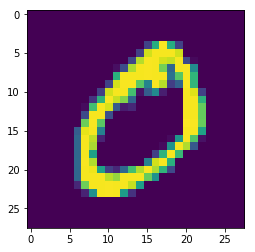

In [27]:
# Display an image
pl.imshow(train_input[1], cmap='viridis')

#### Fig. 1: 2D image of 1st element in train_input

# 3 Create the model

# task 5: create a model with 3 layers: input layer and 2 fully connected layers with 128 and 10 neurons respectively

In [10]:
Nhl = 128
Nhl2 = 10
model = keras.Sequential([keras.layers.Flatten(data_format='channels_first'),
                         keras.layers.Dense(Nhl, activation=tf.nn.sigmoid), 
                          keras.layers.Dense(Nhl2,activation=tf.nn.softmax) ])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# 4 set the hyperparameters
# task 6: set a learning rate of 0.01, a loss function "sparse_categorical_crossentropy" and set the metric to "accuracy
                                              

In [20]:
model.compile?

In [11]:
learning_rate = 0.01
model.compile(optimizer = keras.optimizers.SGD(learning_rate),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy'],
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None,
    distribute=None,)


In [15]:
train_input_2 = train_input / 256.
test_input_2 = test_input / 256.

In [17]:
model.fit(train_input_2, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3789 - acc: 0.8967
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3600 - acc: 0.9006
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3458 - acc: 0.9032
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3344 - acc: 0.9057
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3248 - acc: 0.9077


# Task 7: test the model

In [18]:
test_loss, test_acc = model.evaluate(test_input_2, test_labels)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3075 - acc: 0.9145


#### The model is not overfitting since the accuracy score on test set is same as training set.

# task 8 plot the 10'th test observation and its label and prediction

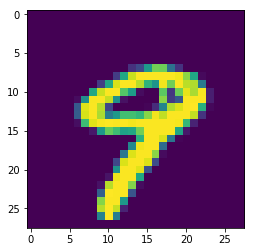

In [28]:
pl.imshow(test_input_2[9], cmap='viridis')

#### Fig. 2: 10'th test observation

In [25]:
pred = model.predict(test_input_2)
# np.argmax(): Returns the indices of the maximum values along an axis
pred = np.argmax(model.predict(test_input_2), axis = 1)

9

In [26]:
test_labels[9], pred[9]

(9, 9)

### Prediction is same as the label

# task 9: find the first wrong prediction in the test set

In [32]:
test_labels, pred

(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8), array([7, 2, 1, ..., 4, 5, 6]))

In [40]:
for i in range(len(test_labels)):
    if test_labels[i] != pred[i]:
        print(i)
i

8
33
46
62
63
66
77
92
124
149
193
195
217
233
241
245
247
259
290
300
307
313
318
320
321
340
341
349
352
362
381
403
412
444
445
448
449
457
468
478
479
495
502
507
511
524
530
531
536
543
551
553
565
569
578
582
591
606
610
613
619
627
628
629
658
659
684
691
707
717
720
728
738
740
741
760
781
791
800
839
844
857
881
882
898
924
938
939
944
947
950
956
959
965
975
982
999
1003
1012
1014
1032
1039
1044
1050
1062
1068
1082
1096
1101
1107
1112
1114
1119
1173
1181
1191
1192
1194
1198
1200
1202
1204
1206
1217
1224
1226
1228
1232
1233
1234
1242
1247
1248
1251
1256
1260
1270
1283
1289
1291
1299
1315
1319
1326
1328
1337
1345
1347
1375
1391
1393
1409
1410
1429
1433
1440
1444
1453
1465
1466
1467
1500
1514
1522
1525
1527
1530
1549
1553
1559
1581
1587
1609
1626
1634
1640
1678
1681
1695
1696
1709
1717
1718
1722
1727
1751
1754
1759
1765
1772
1774
1782
1790
1800
1813
1839
1850
1857
1865
1868
1878
1899
1901
1903
1917
1926
1930
1938
1942
1952
1955
1956
1968
1970
1973
1981
1982
1984
2016
2024
2035
2

9999

### First wrong prediction has index 8

In [41]:
test_labels[8], pred[8]

(5, 6)

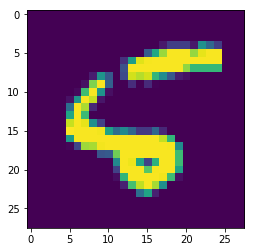

In [42]:
pl.imshow(test_input_2[8], cmap='viridis')

#### Fig. 3: First wrong prediction is 5 labeled as 6, this is because it looks like a 6

task 10: create a more complex model by adding 3 fully connected layers (you choose the size). Retrain and test the accuracy of prediction and discuss if the model is overfitting

In [44]:
Nhl = 128
Nhl2 = 100
Nhl3 = 70
Nhl4 = 40
Nhl5 = 10
model_2 = keras.Sequential([keras.layers.Flatten(data_format='channels_first'),
                         keras.layers.Dense(Nhl, activation=tf.nn.sigmoid),
                          keras.layers.Dense(Nhl2, activation=tf.nn.sigmoid),
                          keras.layers.Dense(Nhl3, activation=tf.nn.sigmoid),
                          keras.layers.Dense(Nhl4, activation=tf.nn.sigmoid),
                          keras.layers.Dense(Nhl5,activation=tf.nn.softmax) ])

In [45]:
learning_rate = 0.1
model_2.compile(optimizer = keras.optimizers.SGD(learning_rate),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy'],
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None,
    distribute=None,)


In [46]:
model_2.fit(train_input_2, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1143
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 1.5524 - acc: 0.4262
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.7434 - acc: 0.7631
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4624 - acc: 0.8706
Epoch 5/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3462 - acc: 0.9032


In [47]:
test_loss, test_acc = model_2.evaluate(test_input_2, test_labels)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3298 - acc: 0.9036


#### The model is not overfitting since the accuracy score on test set is same as training set.